# Playstore - Analysis 

This is an analysis on the different application on google play store . The data contains information like the Rating of the application , Number of installs of the application ,it's type,it's cost,category of the application,it's current version and many more.This data is retrived from the google play store.

In [1]:
project_name = "googleplaystore - analysis" # change this (use lowercase letters and hyphens only)

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian

In [4]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mmaali171996/googleplaystore-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mmaali171996/googleplaystore-analysis


'https://jovian.ai/mmaali171996/googleplaystore-analysis'

## Data Preparation and Cleaning

In [5]:
import numpy as np
import pandas as pd

In [6]:
#play_store_df=pd.read_csv('googleplaystore.csv')
URL = 'https://drive.google.com/file/d/1UjESxD9ywbc1RBF1tjAnZnmd5BwEByo_/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
#df = pd.read_pickle(path)
play_store_df = pd.read_csv(path)

In [7]:
play_store_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [8]:
df_size=play_store_df.shape
df_rows,df_colmuns=df_size
print('the total numbers of rows and coulumns is {} rows and  {} columns\n'.format(df_rows,df_colmuns))
print('the top (10) first rows is \n',)
play_store_df.head(10)

the total numbers of rows and coulumns is 10841 rows and  13 columns

the top (10) first rows is 



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [9]:
print('the bottom (10) last rows is  \n')
play_store_df.tail(10)


the bottom (10) last rows is  



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [10]:
play_store_df[22:33]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
22,Superheroes Wallpapers | 4K Backgrounds,ART_AND_DESIGN,4.7,7699,4.2M,"500,000+",Free,0,Everyone 10+,Art & Design,"July 12, 2018",2.2.6.2,4.0.3 and up
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
24,HD Mickey Minnie Wallpapers,ART_AND_DESIGN,4.7,118,23M,"50,000+",Free,0,Everyone,Art & Design,"July 7, 2018",1.1.3,4.1 and up
25,Harley Quinn wallpapers HD,ART_AND_DESIGN,4.8,192,6.0M,"10,000+",Free,0,Everyone,Art & Design,"April 25, 2018",1.5,3.0 and up
26,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,25M,"500,000+",Free,0,Everyone,Art & Design;Creativity,"October 11, 2017",1.0.8,4.0.3 and up
27,Animated Photo Editor,ART_AND_DESIGN,4.1,203,6.1M,"100,000+",Free,0,Everyone,Art & Design,"March 21, 2018",1.03,4.0.3 and up
28,Pencil Sketch Drawing,ART_AND_DESIGN,3.9,136,4.6M,"10,000+",Free,0,Everyone,Art & Design,"July 12, 2018",6.0,2.3 and up
29,Easy Realistic Drawing Tutorial,ART_AND_DESIGN,4.1,223,4.2M,"100,000+",Free,0,Everyone,Art & Design,"August 22, 2017",1.0,2.3 and up
30,Pink Silver Bow Keyboard Theme,ART_AND_DESIGN,4.2,1120,9.2M,"100,000+",Free,0,Everyone,Art & Design,"July 12, 2018",6.7.12.2018,4.0.3 and up
31,Art Drawing Ideas,ART_AND_DESIGN,4.1,227,5.2M,"50,000+",Free,0,Everyone,Art & Design,"May 31, 2018",1.2,2.3 and up


In [11]:
play_store_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367.0,NaN,NaN,NaN,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### info() is used to check the Information about the data and the datatypes of each respective attribute.
#### play_store_df.info() 

In [12]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## The data has 12 object and 1 numeric feature
 >- we need to convert [Reviews & Size & Installs & Price] to int
 >- we need to Change Last update into a datetime column

## slove1_ convert 'Reviews'  into 'int' type
>- First we convert 'Reviews'  into int type 
>- we use .isnumeric() method to check all values in  'Reviews' 

>- Then we select rows that contain values should be changed 

In [13]:
play_store_df.Reviews.str.isnumeric().sum()

10840

In [14]:
play_store_df[~play_store_df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


## count' slove1_ convert 'Reviews'  into 'int' type
>- No we find one row with index '1072' we want to change Reviews.value to 'int' type 
>- But, as we see this row's values entered in wrong way 
>- we can solve that by setting 'Category' with NaN then shifting all values
>- But, for now we will drop that row 
>- Then set 'Reviews' as 'int' type

In [15]:
play_store_df=play_store_df.drop(play_store_df.index[10472])

In [16]:
play_store_df['Reviews']=play_store_df['Reviews'].astype(int)

In [17]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


## slove2_ convert 'Size'  into 'float' type
>- We here want remove all characters from 'Size'
>- We also next convert 'Size' into 'float' type

In [18]:
play_store_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [19]:
play_store_df['Size']=play_store_df['Size'].str.replace('M','000')
play_store_df['Size']=play_store_df['Size'].str.replace('k','')
play_store_df['Size']=play_store_df['Size'].replace('Varies with device',np.nan)
play_store_df['Size']=play_store_df['Size'].astype(float)

In [20]:
play_store_df['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [21]:
for i in play_store_df['Size']:
    if i < 10:
        play_store_df['Size']=play_store_df['Size'].replace(i,i*1000)
play_store_df['Size']=play_store_df['Size']/1000
play_store_df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [22]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


## slove3_ convert 'Installs' & ' Price'  into 'float' type
>- We will remove all characters _(+ , $) in two columns

In [23]:
play_store_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [24]:
play_store_df['Price' ].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [25]:
play_store_df['Installs']=play_store_df['Installs'].str.replace('+','')
play_store_df['Installs']=play_store_df['Installs'].str.replace(',','')
play_store_df['Installs']=play_store_df['Installs'].astype(int)
play_store_df['Installs']

/tmp/ipykernel_36/109307250.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  play_store_df['Installs']=play_store_df['Installs'].str.replace('+','')


0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: int64

In [26]:
play_store_df['Price']=play_store_df['Price'].str.replace('$','')
play_store_df['Price']=play_store_df['Price'].astype(float)
play_store_df['Price']

/tmp/ipykernel_36/2419837693.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  play_store_df['Price']=play_store_df['Price'].str.replace('$','')


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10840, dtype: float64

In [27]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


## slove4_ convert 'Last Update'  into 'datetime' type

In [28]:
import warnings
warnings.filterwarnings("ignore")
play_store_df['Last Updated']=pd.to_datetime(play_store_df['Last Updated'])
play_store_df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [29]:
play_store_df['Updated_Day']=play_store_df['Last Updated'].dt.day
play_store_df['Updated_Month']=play_store_df['Last Updated'].dt.month
play_store_df['Updated_year']=play_store_df['Last Updated'].dt.year
play_store_df.drop('Last Updated', axis=1, inplace=True)

In [30]:
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Day,Updated_Month,Updated_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


In [31]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Updated_Day     10840 non-null  int64  
 13  Updated_Month   10840 non-null  int64  
 14  Updated_year    10840 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.3+ MB


# Lets do some cleaning for our data set


### 1: Null values
- Here we will first check for null values using isna() method
- Then remove it by using dropna() method

In [32]:
null =play_store_df.isna().sum()
null

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Current Ver          8
Android Ver          2
Updated_Day          0
Updated_Month        0
Updated_year         0
dtype: int64

In [33]:
play_store_df= play_store_df.dropna()
play_store_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Current Ver       0
Android Ver       0
Updated_Day       0
Updated_Month     0
Updated_year      0
dtype: int64

In [34]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   int64  
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   int64  
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   float64
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Current Ver     7723 non-null   object 
 11  Android Ver     7723 non-null   object 
 12  Updated_Day     7723 non-null   int64  
 13  Updated_Month   7723 non-null   int64  
 14  Updated_year    7723 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 965.4+ KB


### 1: Duplicated values
- Here we will first check for Duplicated values using Duplicated() method
- Then remove it by using drop_duplicates(inplace=True) method

In [35]:
duplicate =  play_store_df.duplicated()
duplicate.sum()

305

In [36]:
drop_duplicate = play_store_df.drop_duplicates(inplace=True)
duplicate_New=play_store_df.duplicated()
duplicate_New.sum()

0

In [37]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7418 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7418 non-null   object 
 1   Category        7418 non-null   object 
 2   Rating          7418 non-null   float64
 3   Reviews         7418 non-null   int64  
 4   Size            7418 non-null   float64
 5   Installs        7418 non-null   int64  
 6   Type            7418 non-null   object 
 7   Price           7418 non-null   float64
 8   Content Rating  7418 non-null   object 
 9   Genres          7418 non-null   object 
 10  Current Ver     7418 non-null   object 
 11  Android Ver     7418 non-null   object 
 12  Updated_Day     7418 non-null   int64  
 13  Updated_Month   7418 non-null   int64  
 14  Updated_year    7418 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 927.2+ KB


In [38]:
import jovian

In [39]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mmaali171996/googleplaystore-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mmaali171996/googleplaystore-analysis


'https://jovian.ai/mmaali171996/googleplaystore-analysis'

## Exploratory Analysis and Visualization



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [40]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

- **Here we can count Apps based on it's category**
- **Then visualize it**

In [41]:
play_store_df['Category'].value_counts()


FAMILY                 1590
GAME                    959
TOOLS                   633
PERSONALIZATION         277
MEDICAL                 277
LIFESTYLE               273
FINANCE                 263
SPORTS                  232
PRODUCTIVITY            231
BUSINESS                225
PHOTOGRAPHY             225
COMMUNICATION           206
HEALTH_AND_FITNESS      199
SOCIAL                  170
NEWS_AND_MAGAZINES      162
SHOPPING                159
TRAVEL_AND_LOCAL        147
BOOKS_AND_REFERENCE     143
DATING                  141
VIDEO_PLAYERS           116
MAPS_AND_NAVIGATION      95
EDUCATION                95
FOOD_AND_DRINK           82
ENTERTAINMENT            67
AUTO_AND_VEHICLES        63
LIBRARIES_AND_DEMO       61
ART_AND_DESIGN           58
WEATHER                  51
HOUSE_AND_HOME           50
COMICS                   49
PARENTING                44
EVENTS                   38
BEAUTY                   37
Name: Category, dtype: int64

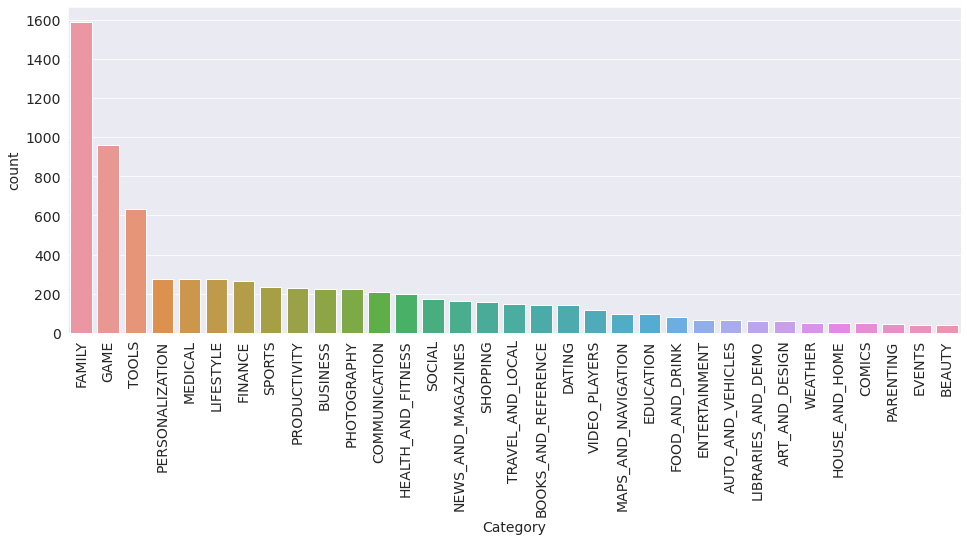

In [42]:
plt.figure(figsize=(16,6))
sns.countplot(play_store_df['Category'],order=play_store_df['Category'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

- **Here we can count number of installs Apps based on it's category**
- **Then visualize it**

In [43]:
category_installs=play_store_df.groupby('Category')['Installs'].sum().sort_values(ascending=False)
category_installs

Category
GAME                   26802452717
FAMILY                  6696812580
TOOLS                   3525553500
COMMUNICATION           3336915530
NEWS_AND_MAGAZINES      3214900550
PRODUCTIVITY            2711302080
PHOTOGRAPHY             2390893130
SHOPPING                1312731540
SPORTS                  1062411465
PERSONALIZATION          997131930
VIDEO_PLAYERS            891762200
HEALTH_AND_FITNESS       803456220
SOCIAL                   794240475
ENTERTAINMENT            748960000
BUSINESS                 491782920
LIFESTYLE                435519120
FINANCE                  316587300
TRAVEL_AND_LOCAL         260638300
EDUCATION                208202000
MAPS_AND_NAVIGATION      175015560
FOOD_AND_DRINK           171567750
WEATHER                  139296500
BOOKS_AND_REFERENCE      134784155
DATING                   105192410
ART_AND_DESIGN            99228100
LIBRARIES_AND_DEMO        59983000
HOUSE_AND_HOME            51482000
AUTO_AND_VEHICLES         43769800
MEDICAL    

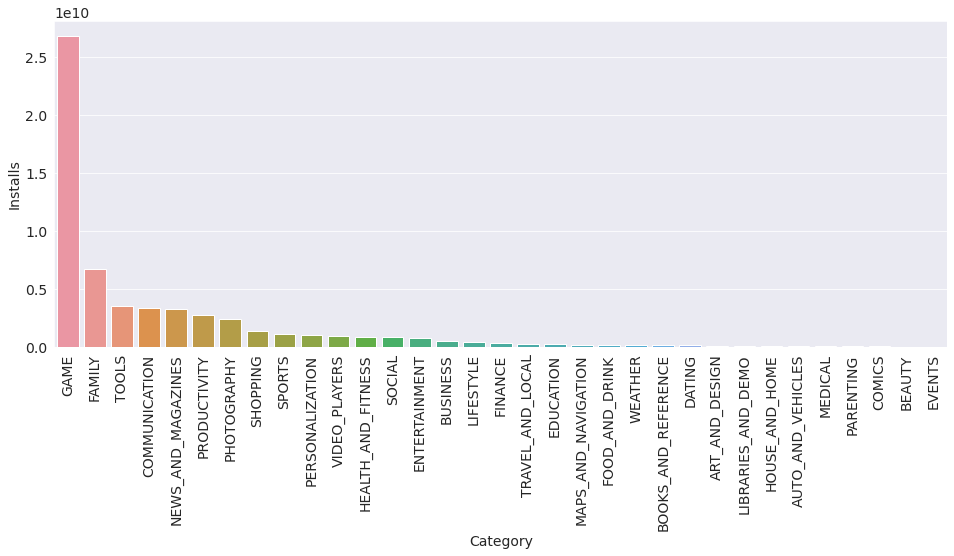

In [44]:
plt.figure(figsize=(16,6))
sns.barplot(category_installs.index,category_installs)
plt.xticks(rotation=90)
plt.show()

- **Does size affect installs**

<AxesSubplot:xlabel='Size'>

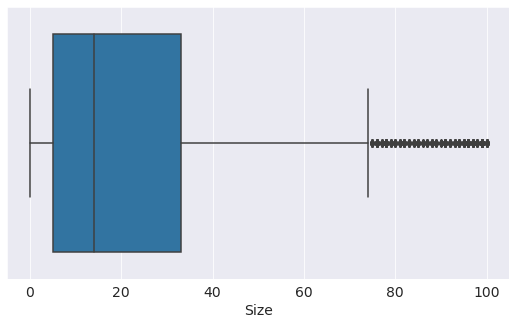

In [45]:
size_installs=play_store_df[play_store_df!= 'Varies with device']
sns.boxplot(size_installs['Size'])

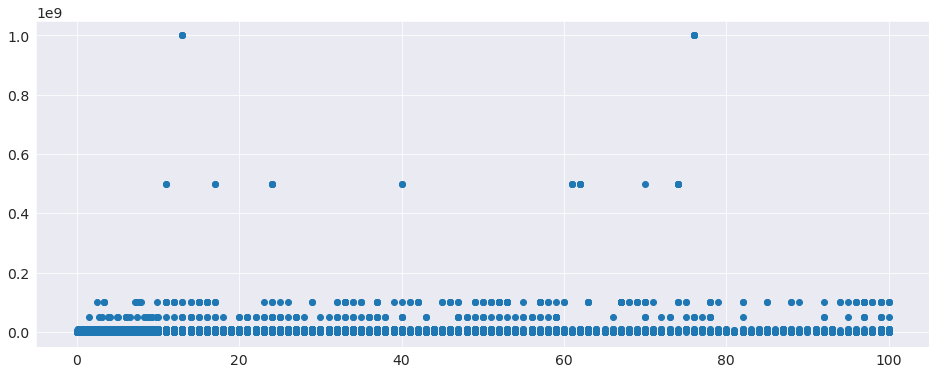

In [46]:
plt.figure(figsize=(16,6))
plt.scatter(size_installs['Size'],size_installs['Installs'])
plt.show()

- **Apps with the highest rating** 

In [47]:
play_store_df.loc[play_store_df['Rating'].idxmax()]

App               Hojiboy Tojiboyev Life Hacks
Category                                COMICS
Rating                                     5.0
Reviews                                     15
Size                                      37.0
Installs                                  1000
Type                                      Free
Price                                      0.0
Content Rating                        Everyone
Genres                                  Comics
Current Ver                                2.0
Android Ver                       4.0.3 and up
Updated_Day                                 26
Updated_Month                                6
Updated_year                              2018
Name: 329, dtype: object

In [48]:
high_ratings=play_store_df[(play_store_df['Rating']>play_store_df['Rating'].mean())]
high_ratings.sort_values('Rating', ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Day,Updated_Month,Updated_year
1038,Mindvalley U Tallinn 2018,EVENTS,5.0,1,21.0,100,Free,0.0,Everyone,Events,1.0.5,4.4 and up,3,7,2018
6232,Bh Public School,FAMILY,5.0,2,8.7,10,Free,0.0,Everyone,Education,1.2,4.0.3 and up,21,3,2018
9517,Ek Vote,PRODUCTIVITY,5.0,43,6.2,500,Free,0.0,Everyone,Productivity,1.1,4.0.3 and up,7,11,2017
9518,Asha Ek Hope - ALS/ MND,MEDICAL,5.0,2,11.0,100,Free,0.0,Everyone,Medical,1.1.0,4.1 and up,23,5,2018
9530,Ek Qissa He Quran Se (Qurani Waqiyat),FAMILY,5.0,4,2.0,100,Free,0.0,Everyone,Entertainment,1.0,4.0 and up,30,10,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7727,CQ: Lost In Transmission,GAME,4.2,4,61.0,10,Free,0.0,Everyone,Action,1.1,4.4 and up,13,5,2018
7733,QRZ Assistant,COMMUNICATION,4.2,1044,3.5,100000,Free,0.0,Everyone,Communication,2.0,4.4 and up,30,5,2018
7740,Gunship Modern Combat 3D,GAME,4.2,3247,26.0,500000,Free,0.0,Teen,Action,1.05,2.3 and up,25,7,2017
7763,Battle Result Predictor for CR,TOOLS,4.2,7063,17.0,1000000,Free,0.0,Everyone,Tools,1.3.0,4.1 and up,4,2,2017


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'FAMILY'),
  Text(1, 0, 'GAME'),
  Text(2, 0, 'TOOLS'),
  Text(3, 0, 'PERSONALIZATION'),
  Text(4, 0, 'MEDICAL'),
  Text(5, 0, 'FINANCE'),
  Text(6, 0, 'SPORTS'),
  Text(7, 0, 'LIFESTYLE'),
  Text(8, 0, 'PRODUCTIVITY'),
  Text(9, 0, 'HEALTH_AND_FITNESS'),
  Text(10, 0, 'PHOTOGRAPHY'),
  Text(11, 0, 'BUSINESS'),
  Text(12, 0, 'SOCIAL'),
  Text(13, 0, 'COMMUNICATION'),
  Text(14, 0, 'SHOPPING'),
  Text(15, 0, 'BOOKS_AND_REFERENCE'),
  Text(16, 0, 'NEWS_AND_MAGAZINES'),
  Text(17, 0, 'TRAVEL_AND_LOCAL'),
  Text(18, 0, 'EDUCATION'),
  Text(19, 0, 'VIDEO_PLAYERS'),
  Text(20, 0, 'DATING'),
  Text(21, 0, 'MAPS_AND_NAVIGATION'),
  Text(22, 0, 'FOOD_AND_DRINK'),
  Text(23, 0, 'ART_AND_DESIGN'),
  Text(24, 0, 'ENTERTAINMENT'),
  Text(25, 0, 'AUTO_AND_VEHICLES'),
  Text(26, 0, 'WEATHER'),
  Text(27, 0, 'LIBRARIES_AND_DEMO'),
  Text(28,

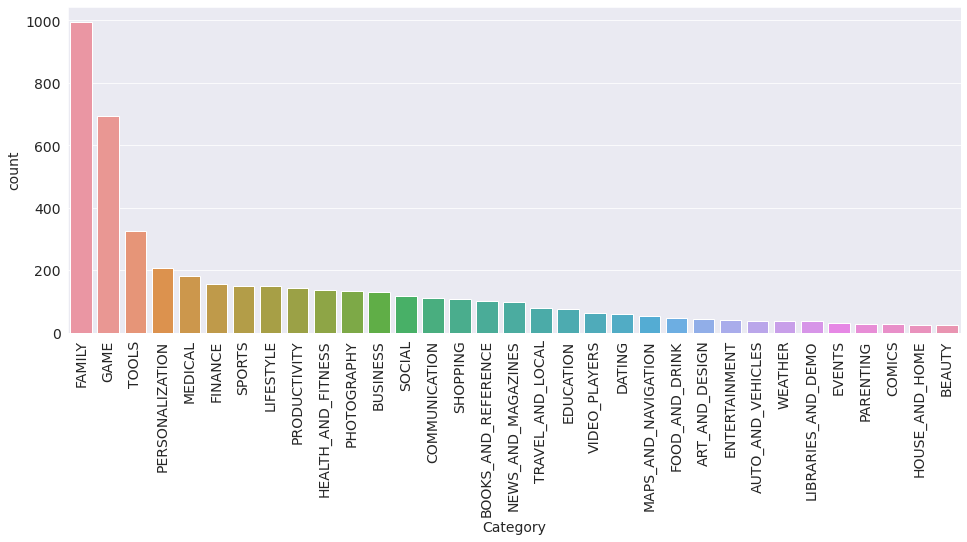

In [49]:
plt.figure(figsize=(16,6))
sns.countplot(high_ratings['Category'],order = (high_ratings['Category'].value_counts().index))
plt.xticks(rotation=90)

In [50]:
import jovian

In [51]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mmaali171996/googleplaystore-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mmaali171996/googleplaystore-analysis


'https://jovian.ai/mmaali171996/googleplaystore-analysis'

## Asking and Answering Questions



## Q1: Which type of apps category crossses half millions installations with more than 4.5 ratings?

In [52]:
good_apps  = play_store_df[(play_store_df.Installs == 500000) & (play_store_df.Rating >=4.5)]
print(good_apps.shape)

(145, 15)


In [53]:
good_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Day,Updated_Month,Updated_year
16,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.7,3632,5.5,500000,Free,0.0,Everyone,Art & Design,3.1,4.1 and up,31,7,2018
22,Superheroes Wallpapers | 4K Backgrounds,ART_AND_DESIGN,4.7,7699,4.2,500000,Free,0.0,Everyone 10+,Art & Design,2.2.6.2,4.0.3 and up,12,7,2018
26,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,25.0,500000,Free,0.0,Everyone,Art & Design;Creativity,1.0.8,4.0.3 and up,11,10,2017
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24.0,500000,Free,0.0,Everyone,Art & Design;Creativity,1.0.9,4.4 and up,2,8,2018
74,Tickets SDA 2019 + Exam RF,AUTO_AND_VEHICLES,4.8,7021,17.0,500000,Free,0.0,Everyone,Auto & Vehicles,1.79,4.0 and up,27,7,2018


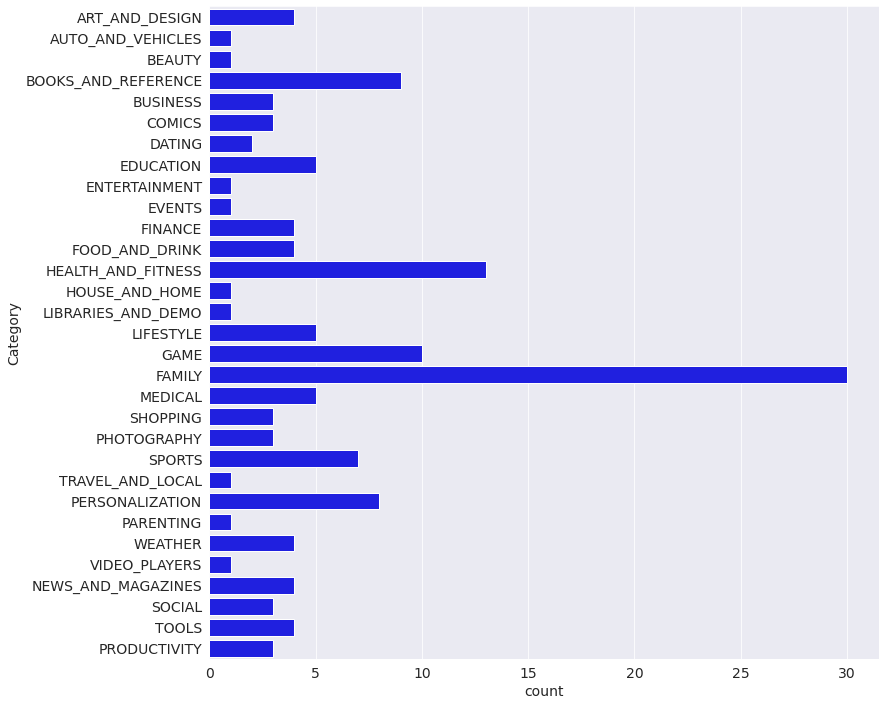

In [54]:
plt.figure(figsize=(12,12))
sns.countplot(y = 'Category',data=good_apps,color='b')
plt.show()

## Q2: How many no of apps installs in different years and in which month?

In [55]:
no_of_installs = play_store_df.groupby('Updated_year').Installs.sum()

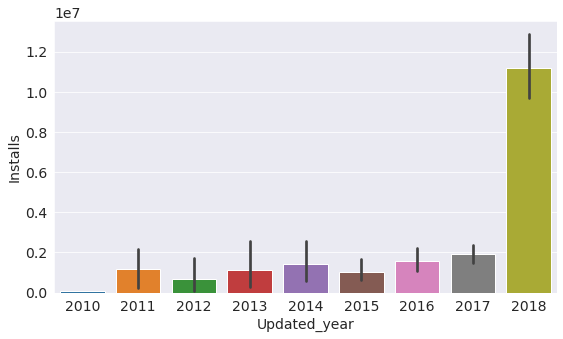

In [56]:
ax = sns.barplot(x="Updated_year", y="Installs", data=play_store_df)

In [57]:
### As we see mostly app installs in 2018 year.
year_2018 = play_store_df[play_store_df.Updated_year == 2018]

<AxesSubplot:xlabel='Updated_Month', ylabel='Installs'>

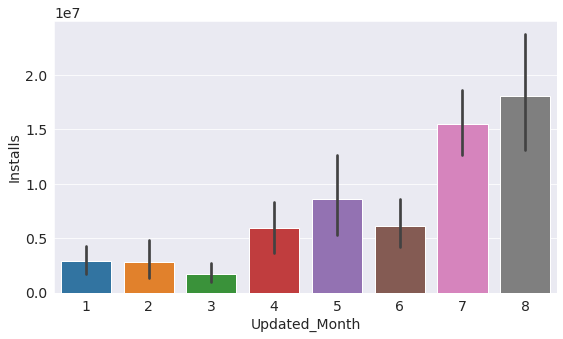

In [58]:
sns.barplot(x="Updated_Month", y="Installs", data=year_2018)
## AS we see mostly app installs between july and august

## Q2: Which Category of apps are mostly installs and get high ratings in 2018 years?

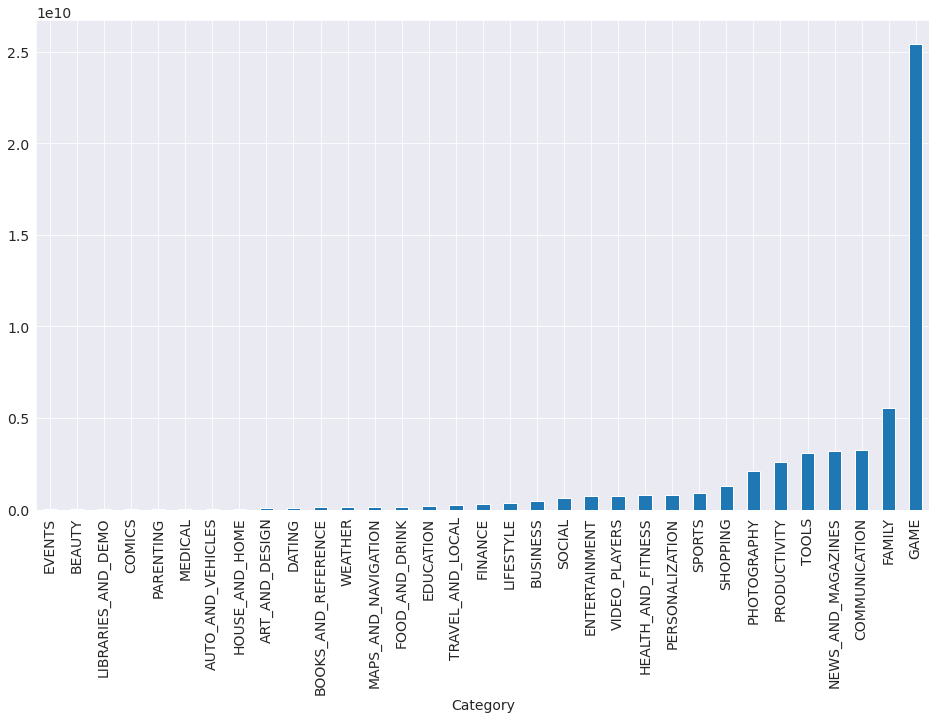

In [59]:
plt.figure(figsize=(16,9))
year_2018.groupby('Category').Installs.sum().sort_values().plot(kind='bar')
plt.show()

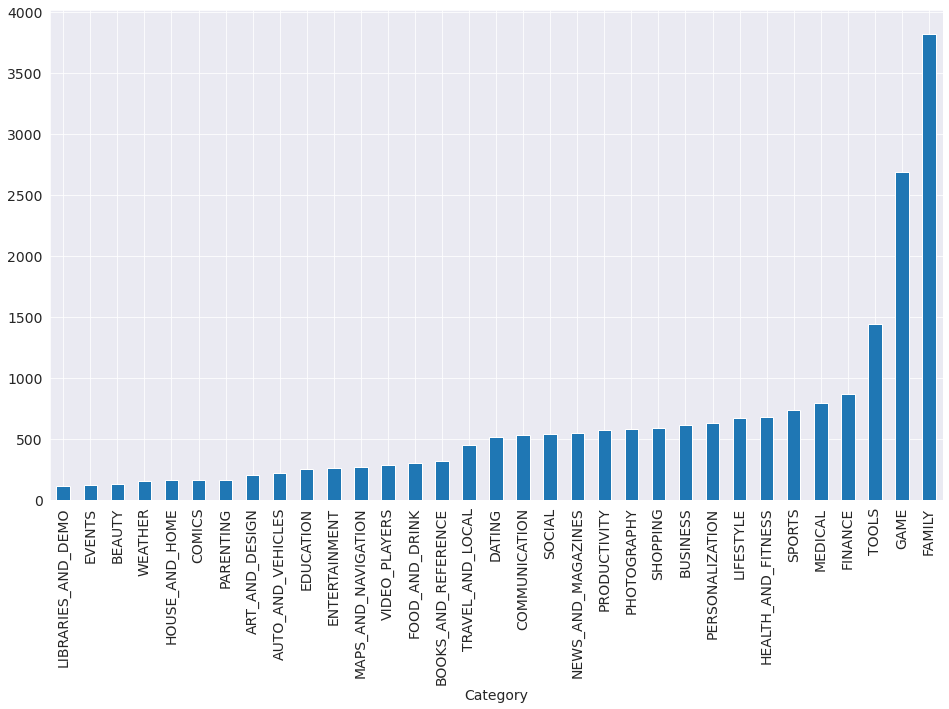

In [60]:
### apps getting highest rating in 2018

plt.figure(figsize=(16,9))
year_2018.groupby('Category').Rating.sum().sort_values().plot(kind='bar')
plt.show()

### - AS we see Game apps are common in both visualization.

## Q4: What is the most popular category that has the largest number of installs?

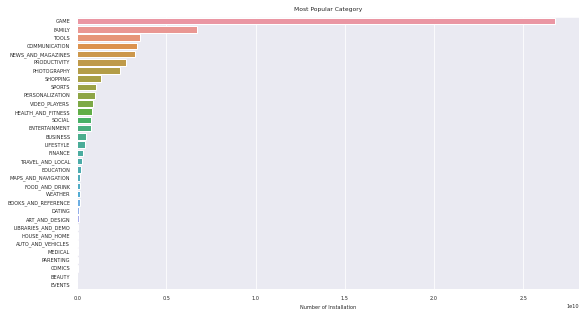

In [61]:
Result = play_store_df.groupby('Category')['Installs'].sum().reset_index()
Result = Result.sort_values('Installs',ascending=False)
plt.rcParams['font.size'] = 5
sns.barplot(Result.values[:,1], Result.values[:,0])
plt.title("Most Popular Category")
plt.ylabel(None);
plt.xlabel('Number of Installation');

## Q5: Compare between the installations of apps on the basis of size?

In [62]:
print(play_store_df['Size'].mean())
print(play_store_df['Size'].max())
print(play_store_df['Size'].min())
print(play_store_df['Size'].median())

22.75389323267725
100.0
0.01
14.0


<AxesSubplot:xlabel='Size', ylabel='Density'>

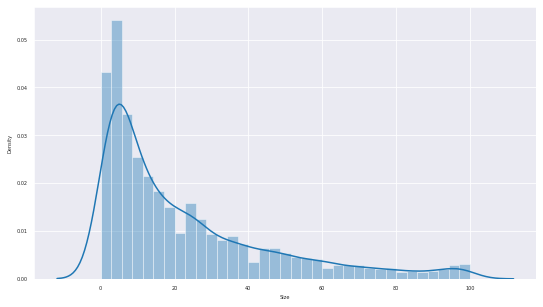

In [63]:
sns.distplot(play_store_df['Size'])

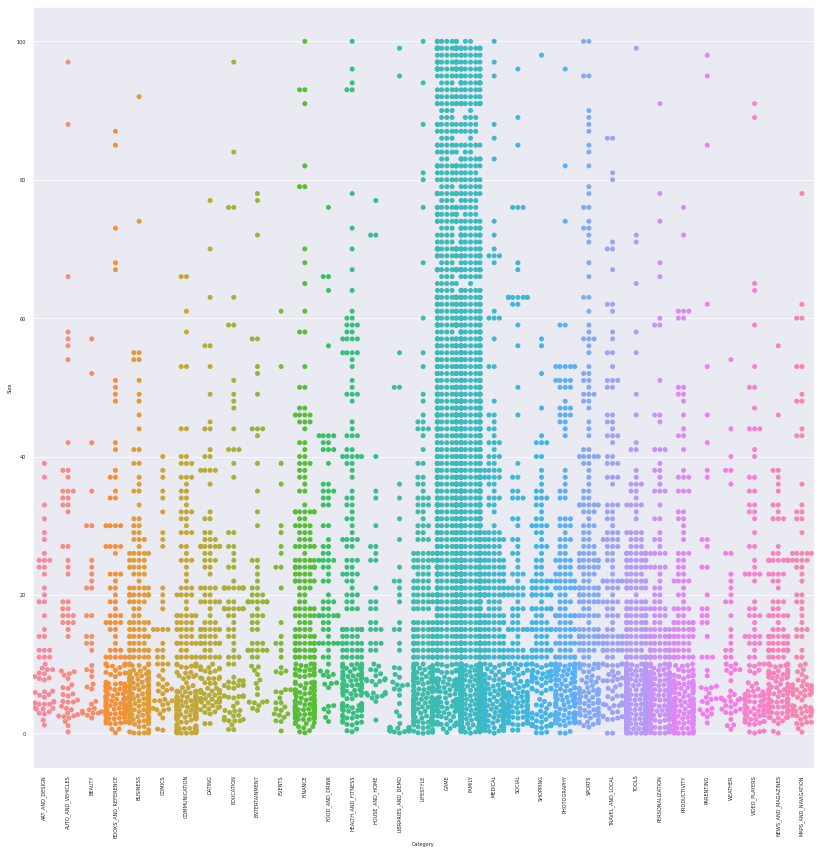

In [64]:
plt.figure(figsize=(14,14))
sns.swarmplot(x="Category", y="Size", data=play_store_df)
plt.xticks(rotation=90)
plt.show()

Let us save and upload our work to Jovian before continuing.

In [65]:
import jovian

In [66]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mmaali171996/googleplaystore-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mmaali171996/googleplaystore-analysis


'https://jovian.ai/mmaali171996/googleplaystore-analysis'

## Inferences and Conclusion

1. Installations of apps suddenly rises in 2018.
2. Mostly downloaded apps are gaming apps.
3. Among all rating of family apps is high.
4. Family and Health and Fitness and Games are among top apps whose installation is greater than half million and rating is above 4.5.

In [67]:
import jovian

In [68]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mmaali171996/googleplaystore-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mmaali171996/googleplaystore-analysis


'https://jovian.ai/mmaali171996/googleplaystore-analysis'

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

In [69]:
import jovian

In [70]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mmaali171996/googleplaystore-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mmaali171996/googleplaystore-analysis


'https://jovian.ai/mmaali171996/googleplaystore-analysis'